In [12]:
import re
import pandas as pd
import numpy as np
from ssvep_analyzer import SsvepAnalyzer

In [13]:
file_path = '../Data/2024-01-06/Marco_Deuteranomaly_0.0_deuteranomaly-contrast-series_frequency_16.5_tile-size144_c28637de-eda6-4ceb-bc15-33d6b104bd80.csv'
df = pd.read_csv(file_path, skiprows=10, header=None)

with open(file_path, 'r') as file:
    content = file.read()
    
match = re.search(r'Frequency:\s*(\d+(\.\d+)?)', content)
stimulus_frequency = float(match.group(1)) if match else None

eeg_data = df.to_numpy()[:, 1:9].astype(float)
marker = df.to_numpy()[:, -1].flatten()

analyzer = SsvepAnalyzer(sampling_rate=250, stimulus_frequency=stimulus_frequency)

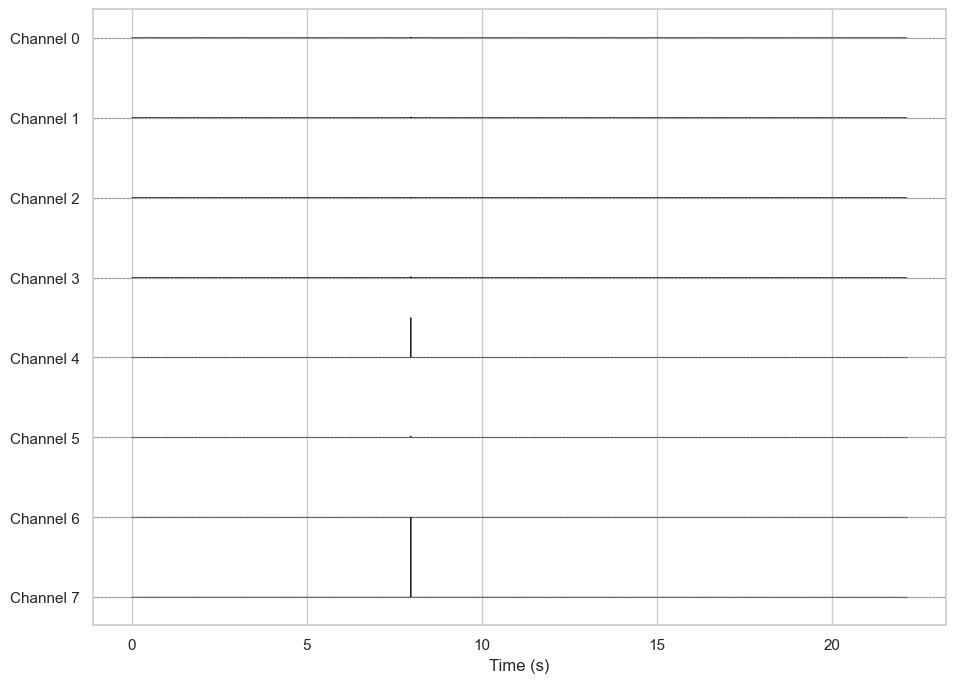

In [14]:
analyzer.plot_eeg(eeg_data);

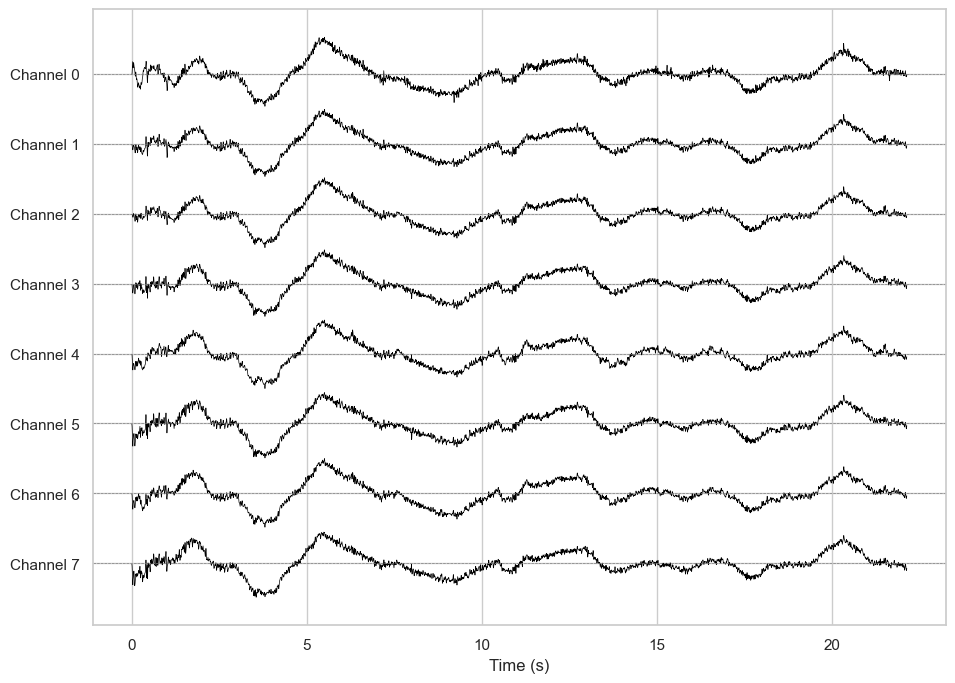

In [15]:
eeg_data = analyzer.filter_extreme_values(eeg_data)
eeg_data = analyzer.apply_linear_detrending(eeg_data)
eeg_data = analyzer.apply_lowpass_filter(eeg_data)
eeg_data = analyzer.apply_highpass_filter(eeg_data)
eeg_data = analyzer.apply_notch_filter(eeg_data)

analyzer.plot_eeg(eeg_data);

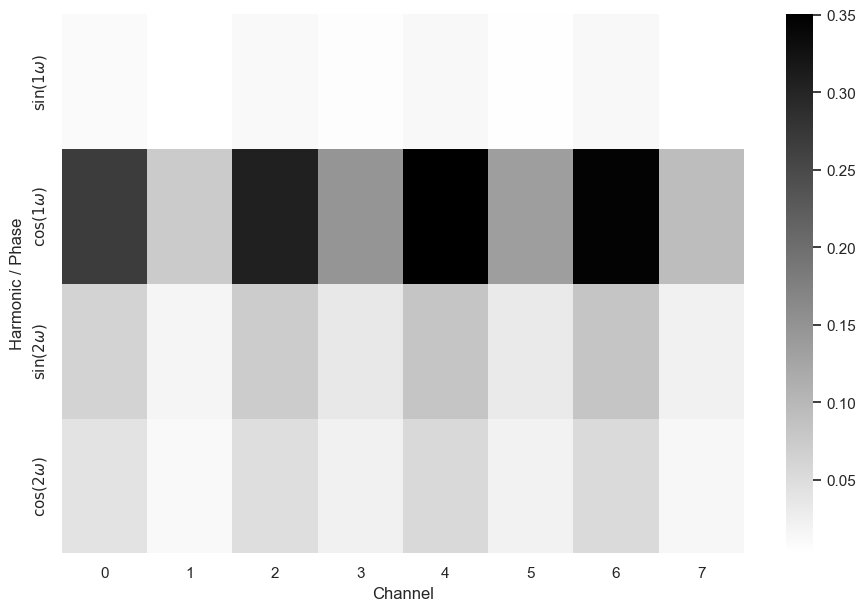

In [16]:
reduced_eeg_data, coefficient_matrix = analyzer.compute_reduced_signal(eeg_data)
analyzer.plot_coefficient_matrix(np.abs(coefficient_matrix));

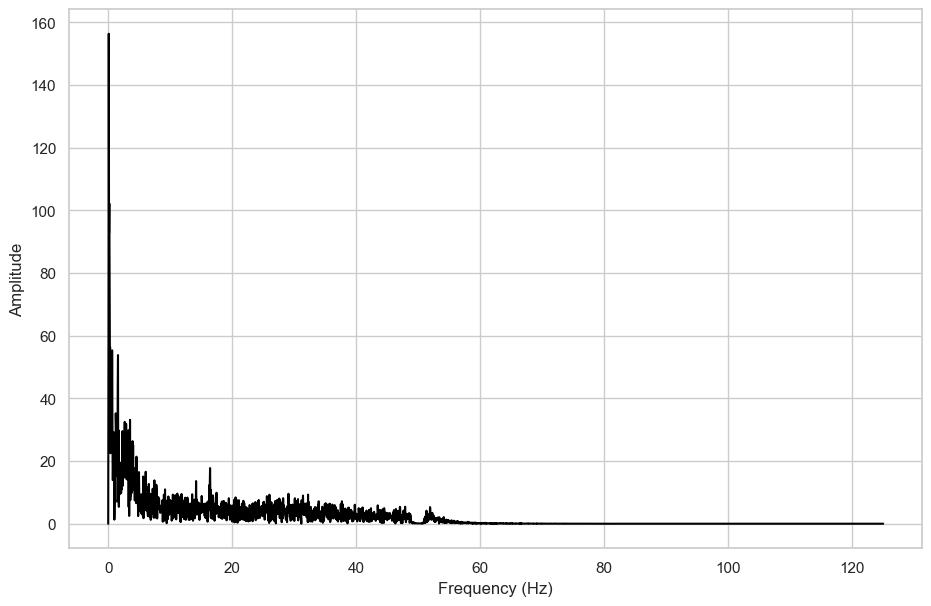

In [17]:
frequencies, spectrum = analyzer.compute_power_spectrum(reduced_eeg_data)
analyzer.plot_power_spectrum(frequencies, spectrum);

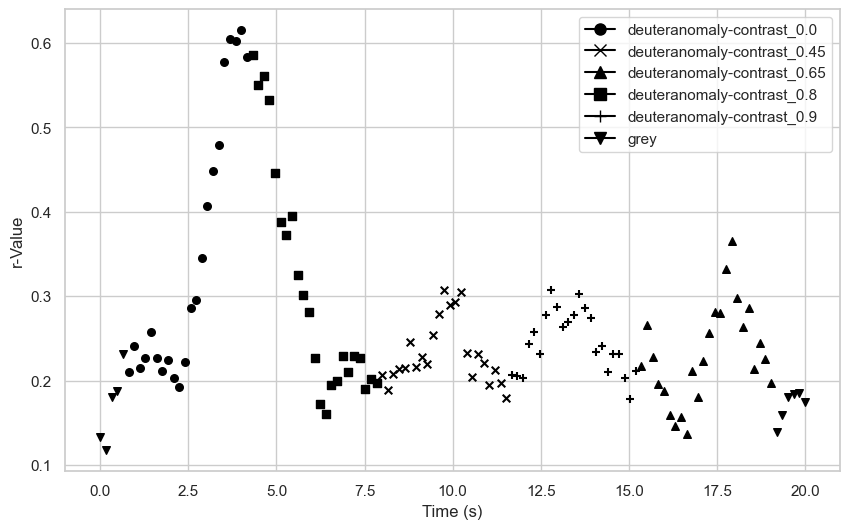

In [18]:
r_values, times, marker_values = analyzer.compute_running_r_values(eeg_data, marker)
analyzer.plot_r_values(r_values, times, marker_values);

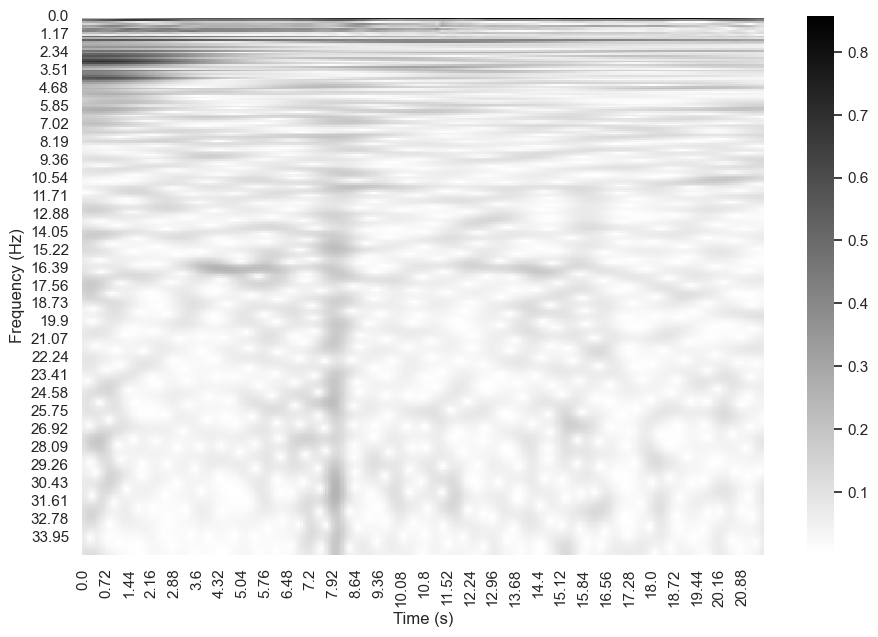

In [19]:
frequencies, times, cwt_matrix = analyzer.compute_wavelet_transform(reduced_eeg_data)
analyzer.plot_wavelet_transform(frequencies, times, np.abs(cwt_matrix));

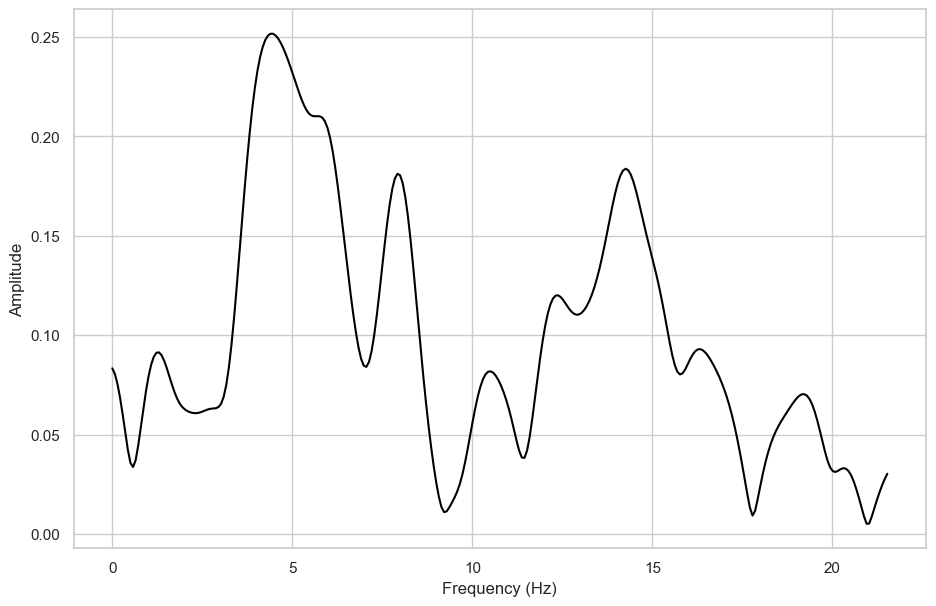

In [20]:
_, times, cwt = analyzer.compute_wavelet_transform(reduced_eeg_data, w=50, frequencies=np.array([stimulus_frequency]));
analyzer.plot_power_spectrum(times, np.abs(cwt.flatten()));